In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/EduMentor-Project/edu_mentor_dataset_final.csv')
df.head()

,student_id,student_name,email_id,password,std,math_grade,english_grade,science_grade,history_grade,overall_grade,...,average_session_duration_minutes,learning_style,content_type_preference,completed_lessons,practice_tests_taken,lms_test_scores,teacher_comments_summary,risk_score,is_at_risk,suggestions_required
0,S1000,Danielle Johnson,danielle.johnson419@gmail.com,p1000,10,78,60,52,95,71.25,...,58,Auditory,Interactive,2,0,61,Average progress,54.68,0,No
1,S1001,Joshua Walker,joshua.walker4022@outlook.com,p1001,11,91,67,88,96,85.50,...,75,Visual,Videos,3,3,34,Needs improvement in basics,71.74,1,Yes
2,S1002,Jill Rhodes,jill.rhodes2296@yahoo.com,p1002,10,68,79,62,62,67.75,...,40,Visual,Texts,13,3,72,Average progress,45.22,0,No
3,S1003,Patricia Miller,patricia.miller8945@gmail.com,p1003,12,54,93,48,95,72.50,...,12,Kinesthetic,Videos,19,7,41,Falling behind in multiple areas,57.55,0,No
4,S1004,Robert Johnson,robert.johnson9684@gmail.com,p1004,10,82,93,56,91,80.50,...,87,Reading/Writing,Texts,5,5,60,Good participation,36.35,0,No


In [ ]:
df.shape

(5000, 28)

In [ ]:
df.drop(['student_name','email_id','student_id','password','teacher_comments_summary','suggestions_required'],inplace=True,axis=1)

In [ ]:
df.head()

,std,math_grade,english_grade,science_grade,history_grade,overall_grade,assignment_completion,engagement_score,math_lec_present,science_lec_present,...,attendance_ratio,login_frequency_per_week,average_session_duration_minutes,learning_style,content_type_preference,completed_lessons,practice_tests_taken,lms_test_scores,risk_score,is_at_risk
0,10,78,60,52,95,71.25,0.93,0.64,6,2,...,0.35,4,58,Auditory,Interactive,2,0,61,54.68,0
1,11,91,67,88,96,85.50,0.67,0.57,8,9,...,0.34,5,75,Visual,Videos,3,3,34,71.74,1
2,10,68,79,62,62,67.75,0.75,0.79,3,8,...,0.40,5,40,Visual,Texts,13,3,72,45.22,0
3,12,54,93,48,95,72.50,0.48,0.87,5,5,...,0.45,6,12,Kinesthetic,Videos,19,7,41,57.55,0
4,10,82,93,56,91,80.50,0.40,0.68,7,13,...,0.60,6,87,Reading/Writing,Texts,5,5,60,36.35,0


In [ ]:
df.shape

(5000, 22)

In [ ]:
df.columns

Index(['std', 'math_grade', 'english_grade', 'science_grade', 'history_grade',
       'overall_grade', 'assignment_completion', 'engagement_score',
       'math_lec_present', 'science_lec_present', 'history_lec_present',
       'english_lec_present', 'attendance_ratio', 'login_frequency_per_week',
       'average_session_duration_minutes', 'learning_style',
       'content_type_preference', 'completed_lessons', 'practice_tests_taken',
       'lms_test_scores'],
      dtype='object')

### Basic EDA Performed

In [ ]:
#Plot Some Distributions
import matplotlib.pyplot as plt
import seaborn as sns

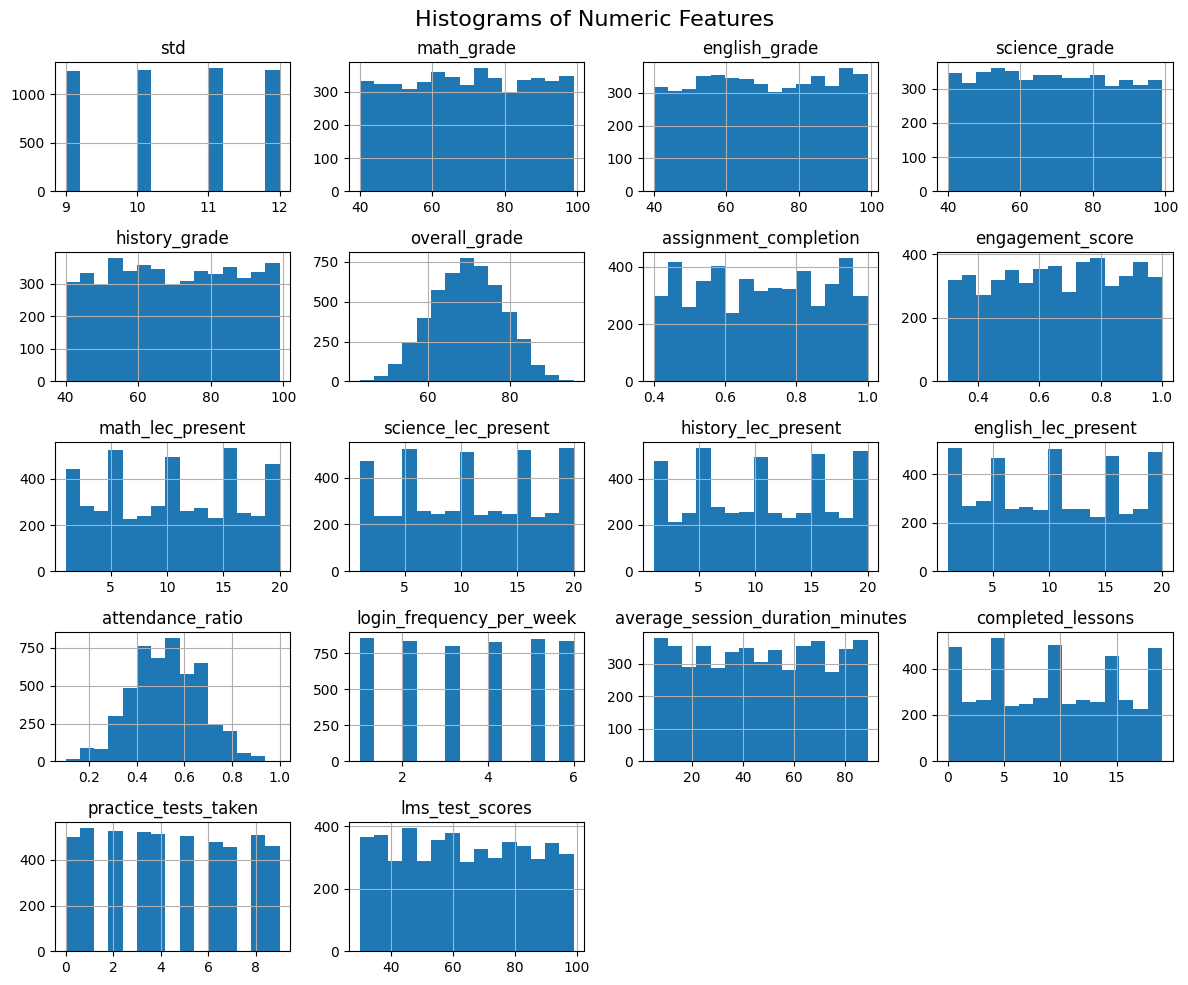

In [ ]:
numeric_columns = [
 'std',
 'math_grade', 'english_grade', 'science_grade', 'history_grade',
 'overall_grade', 'assignment_completion', 'engagement_score',
 'math_lec_present', 'science_lec_present', 'history_lec_present', 'english_lec_present',
 'attendance_ratio', 'login_frequency_per_week', 'average_session_duration_minutes',
 'completed_lessons', 'practice_tests_taken',
 'lms_test_scores'
]

df[numeric_columns].hist(bins=15, figsize=(12,10))
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

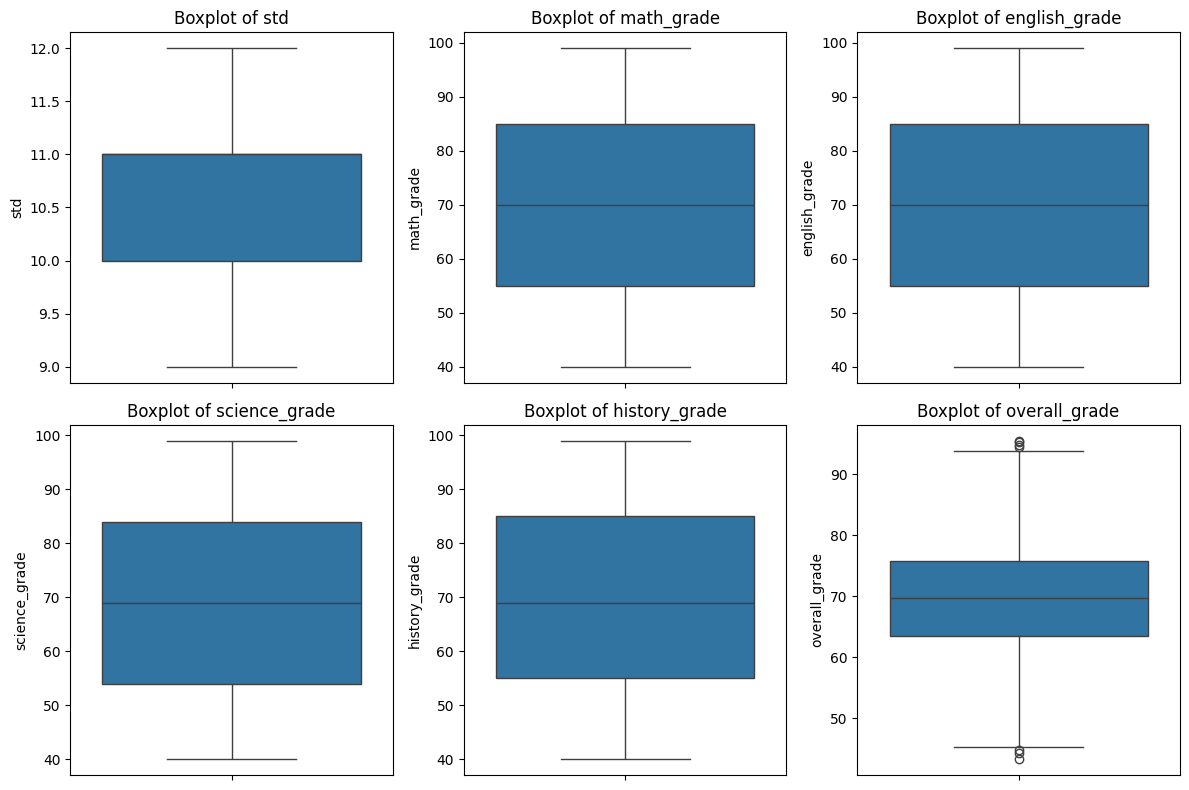

In [ ]:
#boxplot to detect outliers
numeric_columns = df.select_dtypes(include='number').columns[:6]  # limit to 6 columns
plt.figure(figsize=(12, 8))

for i, col in enumerate(numeric_columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [ ]:
df.shape

(5000, 20)

In [ ]:
df.head(1)

,std,math_grade,english_grade,science_grade,history_grade,overall_grade,assignment_completion,engagement_score,math_lec_present,science_lec_present,history_lec_present,english_lec_present,attendance_ratio,login_frequency_per_week,average_session_duration_minutes,learning_style,content_type_preference,completed_lessons,practice_tests_taken,lms_test_scores
0,10,78,60,52,95,71.25,0.93,0.64,6,2,9,11,0.35,4,58,Auditory,Interactive,2,0,61


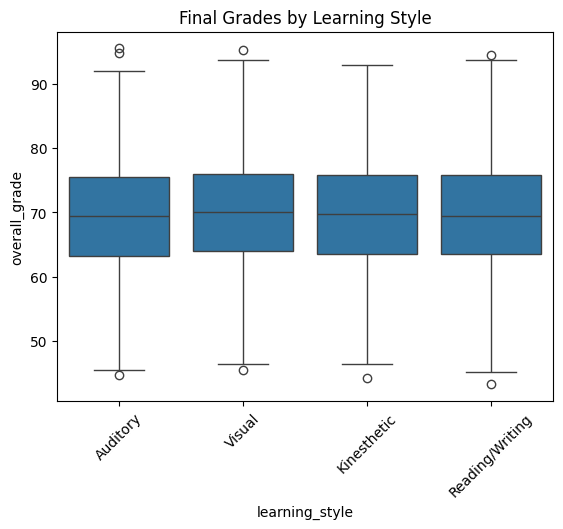

In [ ]:
sns.boxplot(x='learning_style', y='overall_grade', data=df)
plt.title("Final Grades by Learning Style")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.columns

Index(['std', 'math_grade', 'english_grade', 'science_grade', 'history_grade',
       'overall_grade', 'assignment_completion', 'engagement_score',
       'math_lec_present', 'science_lec_present', 'history_lec_present',
       'english_lec_present', 'attendance_ratio', 'login_frequency_per_week',
       'average_session_duration_minutes', 'learning_style',
       'content_type_preference', 'completed_lessons', 'practice_tests_taken',
       'lms_test_scores', 'risk_score', 'is_at_risk'],
      dtype='object')

### Encoding for categorical features

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_cols = ['learning_style', 'content_type_preference']
numerical_cols = [col for col in df.columns if col not in categorical_cols + ['is_at_risk', 'risk_score']]

X = df.drop(['is_at_risk', 'risk_score'], axis=1)
# Targets
y_clf = df['is_at_risk']  # For classification model
y_reg = df['risk_score']      # For regression model



# Define transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)



# Apply transformation
X_processed = preprocessor.fit_transform(X)

In [ ]:
#feature names of preprocessor.pkl
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['num__std', 'num__math_grade', 'num__english_grade',
       'num__science_grade', 'num__history_grade', 'num__overall_grade',
       'num__assignment_completion', 'num__engagement_score',
       'num__math_lec_present', 'num__science_lec_present',
       'num__history_lec_present', 'num__english_lec_present',
       'num__attendance_ratio', 'num__login_frequency_per_week',
       'num__average_session_duration_minutes', 'num__completed_lessons',
       'num__practice_tests_taken', 'num__lms_test_scores',
       'cat__learning_style_Auditory', 'cat__learning_style_Kinesthetic',
       'cat__learning_style_Reading/Writing',
       'cat__learning_style_Visual',
       'cat__content_type_preference_Interactive',
       'cat__content_type_preference_Mixed',
       'cat__content_type_preference_Texts',
       'cat__content_type_preference_Videos'], dtype=object)

In [ ]:
X[:1]

,std,math_grade,english_grade,science_grade,history_grade,overall_grade,assignment_completion,engagement_score,math_lec_present,science_lec_present,history_lec_present,english_lec_present,attendance_ratio,login_frequency_per_week,average_session_duration_minutes,learning_style,content_type_preference,completed_lessons,practice_tests_taken,lms_test_scores
0,10,78,60,52,95,71.25,0.93,0.64,6,2,9,11,0.35,4,58,Auditory,Interactive,2,0,61


In [ ]:
y_clf[:1]

,is_at_risk
0,0


In [ ]:
y_reg[:1]

,risk_score
0,54.68


In [ ]:
X_processed

array([[-0.45105469,  0.48066761, -0.57305698, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.44567431,  1.23362936, -0.16960937, ...,  0.        ,
         0.        ,  1.        ],
       [-0.45105469, -0.09853373,  0.52201509, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.45105469, -1.43069682, -1.43758757, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.44567431,  0.77026828,  1.15600419, ...,  0.        ,
         0.        ,  0.        ],
       [-1.34778369,  0.77026828,  1.27127494, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
df.head(2)

,std,math_grade,english_grade,science_grade,history_grade,overall_grade,assignment_completion,engagement_score,math_lec_present,science_lec_present,...,attendance_ratio,login_frequency_per_week,average_session_duration_minutes,learning_style,content_type_preference,completed_lessons,practice_tests_taken,lms_test_scores,risk_score,is_at_risk
0,10,78,60,52,95,71.25,0.93,0.64,6,2,...,0.35,4,58,Auditory,Interactive,2,0,61,54.68,0
1,11,91,67,88,96,85.50,0.67,0.57,8,9,...,0.34,5,75,Visual,Videos,3,3,34,71.74,1


In [ ]:
df.columns

Index(['std', 'math_grade', 'english_grade', 'science_grade', 'history_grade',
       'overall_grade', 'assignment_completion', 'engagement_score',
       'math_lec_present', 'science_lec_present', 'history_lec_present',
       'english_lec_present', 'attendance_ratio', 'login_frequency_per_week',
       'average_session_duration_minutes', 'learning_style',
       'content_type_preference', 'completed_lessons', 'practice_tests_taken',
       'lms_test_scores', 'risk_score', 'is_at_risk'],
      dtype='object')

### Normalize/Scale numerical features

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = ['std', 'math_grade', 'english_grade', 'science_grade', 'history_grade',
       'overall_grade', 'assignment_completion', 'engagement_score',
       'math_lec_present', 'science_lec_present', 'history_lec_present',
       'english_lec_present', 'attendance_ratio', 'login_frequency_per_week',
       'average_session_duration_minutes','completed_lessons', 'practice_tests_taken',
       'lms_test_scores']

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df.head(2)

,std,math_grade,english_grade,science_grade,history_grade,overall_grade,assignment_completion,engagement_score,math_lec_present,science_lec_present,...,attendance_ratio,login_frequency_per_week,average_session_duration_minutes,learning_style,content_type_preference,completed_lessons,practice_tests_taken,lms_test_scores,risk_score,is_at_risk
0,-0.451055,0.480668,-0.573057,-0.988535,1.455195,0.190451,1.319642,-0.078302,-0.786091,-1.496217,...,-1.199352,0.292120,0.447165,Auditory,Interactive,-1.289644,-1.538956,-0.139732,54.68,0
1,0.445674,1.233629,-0.169609,1.100631,1.512873,1.847459,-0.169718,-0.426093,-0.434435,-0.277828,...,-1.267983,0.874264,1.134600,Visual,Videos,-1.115175,-0.488665,-1.484363,71.74,1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
import joblib

In [ ]:
# Split data
# X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_clf, test_size=0.2, random_state=42)
# X_train,X_test,y_train_reg,y_test_reg = train_test_split(X,y_reg,test_size=0.2,random_state=42)

X_train, X_test, y_train_clf, y_test_clf, y_train_reg, y_test_reg = train_test_split(
    X, y_clf, y_reg, test_size=0.2, random_state=42
)

In [ ]:

clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])

In [ ]:
reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42))
])

In [ ]:
clf_pipeline.fit(X_train, y_train_clf)
reg_pipeline.fit(X_train, y_train_reg)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['std', 'math_grade',
                                                   'english_grade',
                                                   'science_grade',
                                                   'history_grade',
                                                   'overall_grade',
                                                   'assignment_completion',
                                                   'engagement_score',
                                                   'math_lec_present',
                                                   'science_lec_present',
                                                   'history_lec_present',
                                                   'english_lec_present',
                                                   'attendance_ratio',
                                                   'login_frequency_per_week',
                                                   'ave...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [ ]:
X_train[:1]

,std,math_grade,english_grade,science_grade,history_grade,overall_grade,assignment_completion,engagement_score,math_lec_present,science_lec_present,history_lec_present,english_lec_present,attendance_ratio,login_frequency_per_week,average_session_duration_minutes,learning_style,content_type_preference,completed_lessons,practice_tests_taken,lms_test_scores
4227,11,86,54,98,94,83.0,0.95,0.9,12,16,16,6,0.62,5,41,Visual,Mixed,12,3,69


In [ ]:
y_train_clf[:1]

,is_at_risk
4227,0


In [ ]:
y_train_reg[:1]

,risk_score
4227,16.32


In [ ]:
from sklearn.metrics import classification_report

y_pred = clf_pipeline.predict(X_test)
print(classification_report(y_test_clf, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.87      0.88       731
           1       0.67      0.72      0.70       269

    accuracy                           0.83      1000
   macro avg       0.78      0.80      0.79      1000
weighted avg       0.83      0.83      0.83      1000



In [ ]:
import pandas as pd

# 1. Sample 10 random students from X_test
sample_data = X_test.sample(10, random_state=None)  # Fully random sampling

# 2. Predict risk score (regression output)
pred_reg = reg_pipeline.predict(sample_data)

# 3. Predict probability from classifier
probas = clf_pipeline.predict_proba(sample_data)[:, 1]  # Probability of class 1

# 4. Apply classification threshold (adjust if needed)
pred_class = (probas > 0.5).astype(int)  # Change to 0.6 for stricter rule

# 5. Define rule for whether suggestions are needed
risk_score_threshold = 65
prob_threshold = 0.6  # Custom threshold for confidence

pred_suggestions = [
    'Suggestions required' if (prob > prob_threshold or score > risk_score_threshold) else 'No suggestions needed'
    for prob, score in zip(probas, pred_reg)
]

# 6. Combine predictions into a result DataFrame
result_df = pd.DataFrame({
    'risk_score': pred_reg,
    'is_at_risk': pred_class,
    'classifier_confidence': probas,
    'suggestions_required': pred_suggestions
}, index=sample_data.index)

# 7. (Optional) Attach actual test values for evaluation
if 'y_test_clf' in locals() and 'y_test_reg' in locals():
    result_df['actual_is_at_risk'] = y_test_clf.loc[sample_data.index].values
    result_df['actual_risk_score'] = y_test_reg.loc[sample_data.index].values

# 8. Display result
result_df


,risk_score,is_at_risk,classifier_confidence,suggestions_required,actual_is_at_risk,actual_risk_score
2664,50.449261,1,0.875453,Suggestions required,0,35.72
4652,40.553864,0,0.000182,No suggestions needed,0,52.89
3001,47.096493,1,0.682041,Suggestions required,1,67.14
1946,39.664314,0,0.018181,No suggestions needed,0,59.58
144,47.381409,1,0.852692,Suggestions required,1,66.28
2078,41.406254,0,0.000735,No suggestions needed,0,29.82
1503,49.783737,0,0.108526,No suggestions needed,0,55.29
4463,63.308033,1,0.910893,Suggestions required,1,71.86
69,19.883406,0,0.000004,No suggestions needed,0,28.61
4559,50.461369,0,0.000663,No suggestions needed,0,52.65


In [ ]:
# new_data.replace({'teacher_comments_summary': {
#     'Falling behind in multiple areas': 0,
#     'Lacks focus': 1,
#     'Needs improvement in basics': 2,
#     'Good participation': 3,
#     'Average progress': 4,
#     'Can do better with more effort': 5,
#     'Consistent performance': 6,
#     'Excellent progress': 7,
#     'Shows initiative': 8
# }}, inplace=True)

### Predictions For Classification with Different Algorithms

In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.1 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
import xgboost as xgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [ ]:
Model = {
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    'XGBoost Classifier': xgb.XGBClassifier(random_state=42, verbosity=0),
    'Gradient Boost Classifier': GradientBoostingClassifier(random_state=42),
    'XGRF Classifier': xgb.XGBRFClassifier(random_state=42, verbosity=0),
    'LGBM Classifier': LGBMClassifier(random_state=42, verbose=-1),
    'CatBoost Classifier': CatBoostClassifier(verbose=0, random_state=42),
    'SVM': SVC(probability=True),
    'Naive Bayes': BernoulliNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

In [ ]:
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

In [ ]:
# from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# accuracies = {}

# for name, model in Model.items():
#     model.fit(X_train, y_train_class)
#     y_pred = model.predict(X_test)
#     acc = accuracy_score(y_test_class, y_pred)
#     accuracies[name] = acc


# f1_scores = {}

# for name, model in Model.items():
#     model.fit(X_train, y_train_class)
#     y_pred = model.predict(X_test)
#     f1 = f1_score(y_test_class, y_pred)
#     f1_scores[name] = f1

# recall_scores = {}

# for name, model in Model.items():
#     model.fit(X_train, y_train_class)
#     y_pred = model.predict(X_test)
#     recall = recall_score(y_test_class, y_pred)
#     recall_scores[name] = recall

# precision_scores = {}

# for name, model in Model.items():
#     model.fit(X_train, y_train_class)
#     y_pred = model.predict(X_test)
#     precision = precision_score(y_test_class, y_pred)
#     precision_scores[name] = precision



from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Dictionary to store all metrics
model_scores = {}

# Loop through each model
for name, model in Model.items():
    print(f"Training and evaluating: {name}")

    # Fit the model (optionally on SMOTE data if used)
    model.fit(X_train_proc, y_train_clf)

    # Predict
    y_pred = model.predict(X_test_proc)

    # Compute all metrics
    model_scores[name] = {
        'Accuracy': accuracy_score(y_test_clf, y_pred),
        'F1-Score': f1_score(y_test_clf, y_pred),
        'Recall': recall_score(y_test_clf, y_pred),
        'Precision': precision_score(y_test_clf, y_pred)
    }



Training and evaluating: Random Forest Classifier
Training and evaluating: XGBoost Classifier
Training and evaluating: Gradient Boost Classifier
Training and evaluating: XGRF Classifier
Training and evaluating: LGBM Classifier


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Training and evaluating: CatBoost Classifier
Training and evaluating: SVM
Training and evaluating: Naive Bayes
Training and evaluating: Logistic Regression


In [ ]:
combined_scores = {}

for model in model_scores:
    combined_scores[model] = {
        'Accuracy': model_scores[model]['Accuracy'],
        'F1-Score': model_scores[model]['F1-Score'],
        'Recall': model_scores[model]['Recall'],
        'Precision': model_scores[model]['Precision']
    }


In [ ]:
Model_Accuracy = pd.DataFrame.from_dict(combined_scores, orient='index')

In [ ]:
Model_Accuracy = Model_Accuracy.sort_values(by='Accuracy', ascending=False)
Model_Accuracy

,Accuracy,F1-Score,Recall,Precision
XGRF Classifier,0.837,0.741680,0.869888,0.646409
CatBoost Classifier,0.837,0.716522,0.765799,0.673203
XGBoost Classifier,0.831,0.695495,0.717472,0.674825
LGBM Classifier,0.829,0.695187,0.724907,0.667808
Gradient Boost Classifier,0.829,0.691892,0.713755,0.671329
Random Forest Classifier,0.819,0.641584,0.602230,0.686441
SVM,0.815,0.629259,0.583643,0.682609
Logistic Regression,0.789,0.534216,0.449814,0.657609
Naive Bayes,0.745,0.357683,0.263941,0.554688


Cross Validation for Classification

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
import warnings

warnings.filterwarnings("ignore")

f1 = make_scorer(f1_score)

for name, model in Model.items():
    scores = cross_val_score(model, X_train_proc, y_train_clf, cv=5, scoring=f1)

    print(f"F1 scores for 5-fold cross-validation ({name}): {scores}")


F1 scores for 5-fold cross-validation (Random Forest Classifier): [0.53763441 0.62155388 0.57617729 0.63753213 0.64851485]
F1 scores for 5-fold cross-validation (XGBoost Classifier): [0.61390887 0.64516129 0.60309278 0.64133017 0.67294118]
F1 scores for 5-fold cross-validation (Gradient Boost Classifier): [0.62884161 0.65747126 0.63157895 0.66976744 0.6819222 ]
F1 scores for 5-fold cross-validation (XGRF Classifier): [0.69565217 0.67908903 0.68522484 0.67510549 0.70464135]
F1 scores for 5-fold cross-validation (LGBM Classifier): [0.62117647 0.6712963  0.64197531 0.64953271 0.69605568]
F1 scores for 5-fold cross-validation (CatBoost Classifier): [0.63461538 0.6833713  0.64864865 0.69444444 0.68055556]
F1 scores for 5-fold cross-validation (SVM): [0.52291105 0.61845387 0.5505618  0.59102902 0.5483871 ]
F1 scores for 5-fold cross-validation (Naive Bayes): [0.35443038 0.39263804 0.40366972 0.39498433 0.37037037]
F1 scores for 5-fold cross-validation (Logistic Regression): [0.47428571 0.539

### Predictions For Regression with Different Algorithms

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


In [ ]:
Model = {
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boost Regressor': GradientBoostingRegressor(random_state=42),
    'XGRF Regressor': xgb.XGBRegressor(random_state=42, verbosity=0),
    'LGBM LGBMRegressor': LGBMRegressor(random_state=42, verbose=-1),
    'CatBoost Regressor': CatBoostRegressor(verbose=0, random_state=42),
    'SVR': SVR(),
    'Linear Regression': LinearRegression()
}

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,root_mean_squared_error

mse_eval = {}

for name, model in Model.items():
    model.fit(X_train_proc, y_train_reg)
    y_pred = model.predict(X_test_proc)
    mse= mean_squared_error(y_test_reg, y_pred)
    mse_eval[name] = mse


r2score = {}

for name, model in Model.items():
    model.fit(X_train_proc, y_train_reg)
    y_pred = model.predict(X_test_proc)
    r2 = r2_score(y_test_reg, y_pred)
    r2score[name] = r2

mae_eval = {}

for name, model in Model.items():
    model.fit(X_train_proc, y_train_reg)
    y_pred = model.predict(X_test_proc)
    mae = mean_absolute_error(y_test_reg, y_pred)
    mae_eval[name] = mae

rmse= {}

for name, model in Model.items():
    model.fit(X_train_proc, y_train_reg)
    y_pred = model.predict(X_test_proc)
    r_mse = root_mean_squared_error(y_test_reg, y_pred)
    rmse[name] = r_mse


In [ ]:
combined_scores = {}

for model in mse_eval:
    combined_scores[model] = {
        'mean_squared_error': mse_eval[model],
        'R2-score': r2score[model],
        'mean-absolute-error': mae_eval[model],
        'root-mean-squared-error': rmse[model]
    }


In [ ]:
Model_Accuracy = pd.DataFrame.from_dict(combined_scores, orient='index')

In [ ]:
Model_Accuracy = Model_Accuracy.sort_values(by='mean_squared_error', ascending=True)
Model_Accuracy

,mean_squared_error,R2-score,mean-absolute-error,root-mean-squared-error
Gradient Boost Regressor,126.891193,0.593100,9.806242,11.264599
CatBoost Regressor,130.466198,0.581636,9.767368,11.422180
LGBM LGBMRegressor,130.912783,0.580204,9.684736,11.441712
Random Forest Regressor,132.893298,0.573854,9.855783,11.527936
Linear Regression,149.001543,0.522200,10.844582,12.206619
XGRF Regressor,151.172056,0.515239,10.205013,12.295205
SVR,166.767032,0.465231,11.025642,12.913831


### Cross Validation for Regresssion

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Define model
reg_model = RandomForestRegressor(random_state=42)

# Use scoring method like 'neg_mean_squared_error' or 'r2'
scores = cross_val_score(reg_model, X_train_proc, y_train_reg, cv=5, scoring='neg_mean_squared_error')

# Convert to RMSE
rmse_scores = np.sqrt(-scores)

print("Cross-validated RMSE scores:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())

Cross-validated RMSE scores: [11.4060615  11.59638174 11.46677862 11.72528815 11.47626044]
Average RMSE: 11.534154091680577


In [ ]:
import joblib

# Save models
joblib.dump(clf_pipeline, 'risk_classifier.pkl')
joblib.dump(reg_pipeline, 'risk_regressor.pkl')

# Later: Load them
clf_model = joblib.load('risk_classifier.pkl')
reg_model = joblib.load('risk_regressor.pkl')



In [ ]:
#download models
from google.colab import files
files.download('risk_classifier.pkl')
files.download('risk_regressor.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>